<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import DeepLabV3_ResNet50_Weights, deeplabv3_resnet50
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import draw_segmentation_masks

In [61]:
img = read_image("/content/sample_data/humans.jpg")

img = transforms.Resize((480, 640))(img)

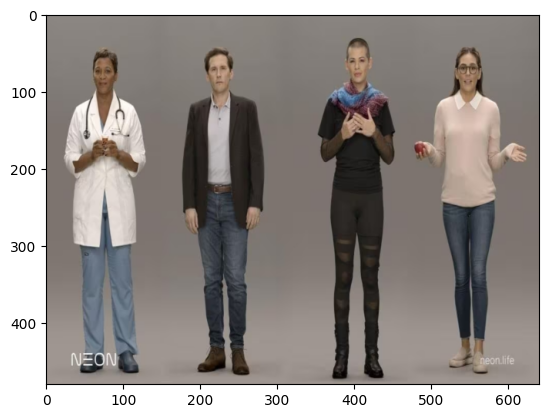

In [62]:
t_img = np.array(img)
t_img = t_img.transpose(1, 2, 0)
plt.imshow(t_img)

In [63]:
weights = DeepLabV3_ResNet50_Weights.DEFAULT

model = deeplabv3_resnet50(weights = weights)

model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [64]:
preprocess = weights.transforms(resize_size=480)

In [65]:
batch = preprocess(img)
batch = batch.unsqueeze(0)

In [66]:
with torch.no_grad():
  pred = model(batch)["out"]

mask = pred.argmax(dim=1)
mask = mask[0]

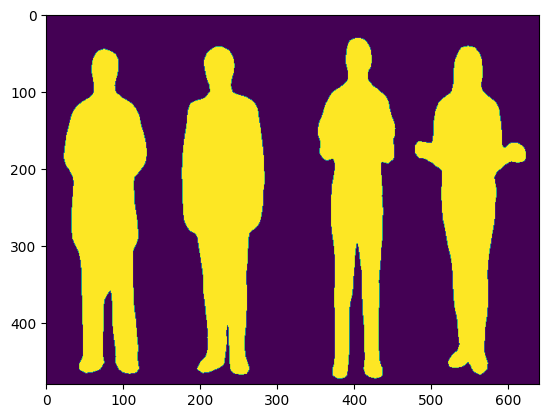

In [67]:
plt.imshow(mask)

In [68]:
forest = read_image("/content/sample_data/forest.jpg")
forest = transforms.Resize((480, 640))(forest).float()

In [78]:
mask_bool = mask.to(torch.bool)


masked = img.clone().float()
forest[:, mask_bool] = masked[:, mask_bool]
masked_uint8 = forest.to(torch.uint8)

masked_final = draw_segmentation_masks(masked_uint8, mask_bool, alpha=0.5)

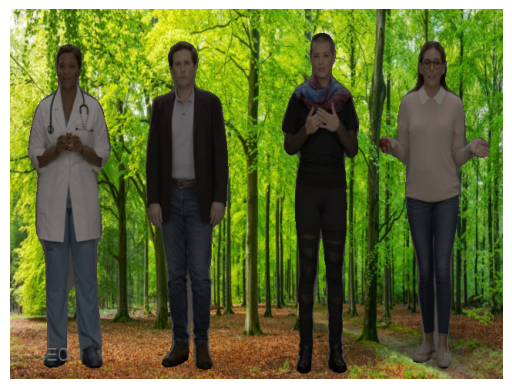

In [77]:
plt.imshow(masked_final.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = []
frames = []
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

In [ ]:
# працює в інтерпритаторі

import cv2
from ultralytics import YOLO


cap = cv2.VideoCapture("Highway driving during the day front view camera driving plate 4k footage.mp4")
ret, frame = cap.read()

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))


output = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

model = YOLO("yolov9c")

names = model.names
threshold = 0.45
print(names)

# 2, 5, 7, 11,


while ret:

    results = model.predict(frame, imgsz=640, conf=0.35, classes=[2, 5, 7, 11])[0]


    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        name = names[int(class_id)]
        if score > threshold:


            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, name, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    output.write(frame)

    cv2.imshow("Video", frame)
    ret, frame = cap.read()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)